In [59]:
from datetime import date

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [60]:
def rebin(df_in):
    # rebin values for each country
    countries = set(df_in['Country/Region'])

    xlength = len(countries)
    ylength = df_in.shape[1] - 4

    data = np.ones((ylength, xlength), dtype=float)
    df = pd.DataFrame(data, index=np.arange(ylength), columns=countries)

    for row in df_in.to_numpy():
        country = row[1]

        for i, n in enumerate(row[4:]):
            df[country][i] += n

    return df

In [61]:
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
death_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_death_global.csv'
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

df_confirmed = rebin(pd.read_csv(confirmed_url))
df_confirmed

,Qatar,Italy,Madagascar,San Marino,Belgium,Bulgaria,Serbia,Austria,India,Pakistan,...,Romania,Latvia,Mauritius,Chile,Mauritania,Saint Kitts and Nevis,Chad,Jordan,Eswatini,Costa Rica
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,128804.0,381603.0,16755.0,760.0,191960.0,27508.0,35455.0,60225.0,7370469.0,321878.0,...,168491.0,3057.0,416.0,486497.0,7586.0,20.0,1351.0,33010.0,5734.0,93153.0
268,128993.0,391612.0,16755.0,760.0,202152.0,28506.0,35720.0,61388.0,7432681.0,322453.0,...,172517.0,3205.0,418.0,488191.0,7604.0,20.0,1362.0,34549.0,5747.0,94349.0
269,129228.0,402537.0,16811.0,760.0,213116.0,29109.0,35947.0,63135.0,7494552.0,323020.0,...,176469.0,3393.0,418.0,490004.0,7608.0,20.0,1366.0,36054.0,5766.0,95515.0
270,129432.0,414242.0,16811.0,760.0,222254.0,29504.0,36161.0,64807.0,7550274.0,323453.0,...,180389.0,3451.0,418.0,491761.0,7609.0,20.0,1380.0,37574.0,5781.0,95515.0


In [62]:
countries = [
    ('Germany', 'tab:red'),
    ('Sweden', 'tab:green'),
    ('Italy', 'tab:orange'),
    #('Austria', 'tab:brown'),
    ('United Kingdom', 'tab:gray'), 
    ('Spain', 'tab:pink'),
    ('US', 'tab:blue'),
    #('China', 'tab:olive'),
    #('Korea, South', 'tab:cyan'),
    ('France', 'tab:cyan'),
    #('Singapore', 'tab:purple')
]

In [123]:
def plot(df, countries, xmin=-270, xmax=0, ymin=1, ymax=10000000, title=None, linestyle='--', marker='s'):
    fig, ax = plt.subplots()
    
    for country, color in countries:
        x = df[country].index - df[country].index[-1]
        y = df[country]
        y_last = int(y[df[country].last_valid_index()])
        
        label = '{} ({})'.format(country, y_last)
        plt.semilogy(x, y, label=label, linestyle='--', marker=marker, color=color)
        
    if title:
        ax.set_title(title)

    ax.grid(True, which="major", color='black')
    ax.grid(True, which="minor", linestyle='--')
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([ymin,ymax])
    ax.set_xlabel('days since {}'.format(date.today()))
    ax.set_ylabel('number of new cases')
    ax.set_xticks(np.arange(xmin, xmax + 1, 7))
    ax.set_xticks(np.arange(xmin, xmax), minor=True)
    ax.legend(loc='upper left')

    fig = plt.gcf()
    fig.set_size_inches(36, 8)

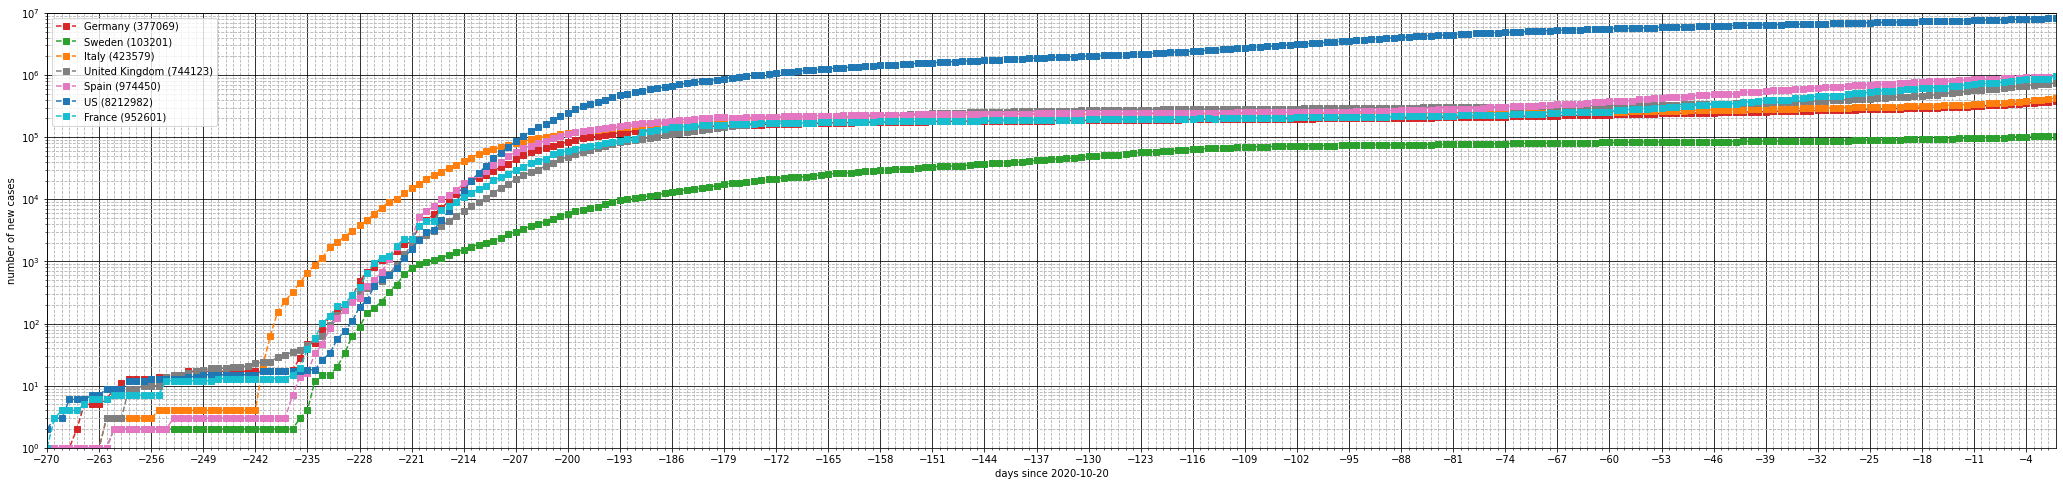

In [124]:
plot(df_confirmed, countries)

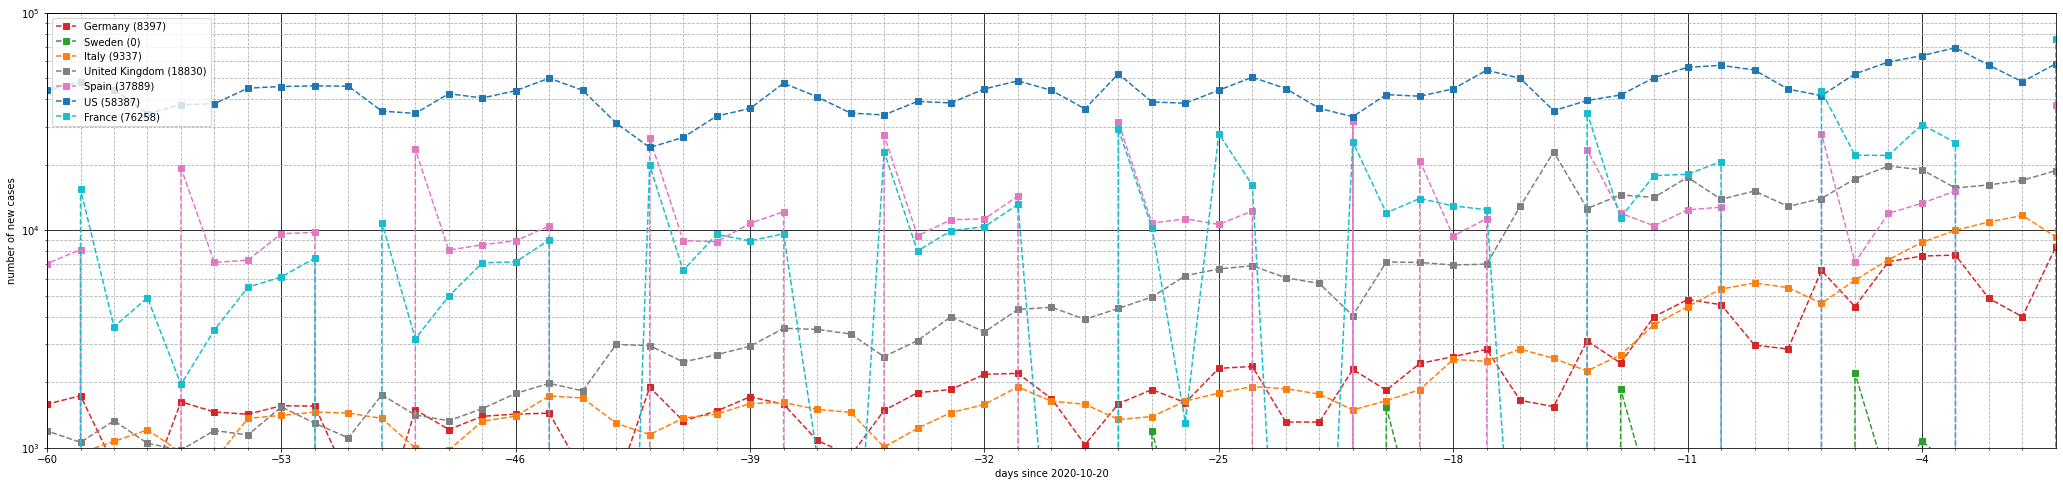

In [125]:
plot(df_confirmed.diff(), countries, ymin=1e3, ymax=1e5, xmin=-60)

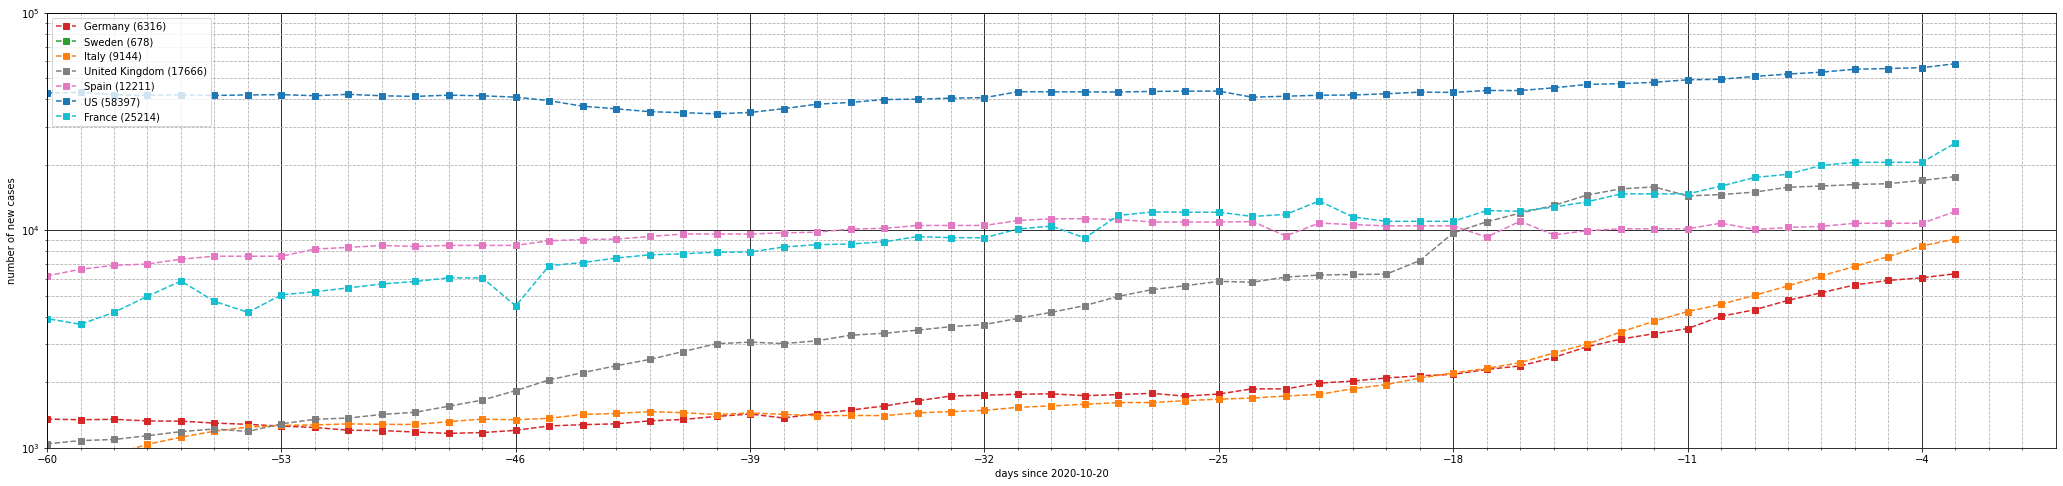

In [126]:
plot(df_confirmed.diff().rolling(7, center=True).mean(), countries, ymin=1e3, ymax=1e5, xmin=-60)